In [74]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [75]:
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv', index_col=0)
df.head()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0


# Mean Squared Error Model

Calculate the MSE for the exising practice with 90 standby drivers by default.

In [ ]:
mean_squared_error(df.n_sby.iloc[920:], df.sby_need.iloc[920:])

The mean squared error for the existing method is 10830732.0

# Linear Regression for comparison

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
model = LinearRegression()

In [78]:
# train test split
X = df.index.values.reshape(-1,1)
y = df.sby_need.values.reshape(-1,1)

In [79]:
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

In [109]:
x_test, x_train = train_test_split(X, 920)
y_test, y_train = train_test_split(X, 920)

In [110]:
model.fit(x_train, y_train)

LinearRegression()

In [117]:
import numpy as np
pred = model.predict(y_test)

pred    
#df['y_predicted'] = pred

array([[1.13686838e-13],
       [1.00000000e+00],
       [2.00000000e+00],
       [3.00000000e+00],
       [4.00000000e+00],
       [5.00000000e+00],
       [6.00000000e+00],
       [7.00000000e+00],
       [8.00000000e+00],
       [9.00000000e+00],
       [1.00000000e+01],
       [1.10000000e+01],
       [1.20000000e+01],
       [1.30000000e+01],
       [1.40000000e+01],
       [1.50000000e+01],
       [1.60000000e+01],
       [1.70000000e+01],
       [1.80000000e+01],
       [1.90000000e+01],
       [2.00000000e+01],
       [2.10000000e+01],
       [2.20000000e+01],
       [2.30000000e+01],
       [2.40000000e+01],
       [2.50000000e+01],
       [2.60000000e+01],
       [2.70000000e+01],
       [2.80000000e+01],
       [2.90000000e+01],
       [3.00000000e+01],
       [3.10000000e+01],
       [3.20000000e+01],
       [3.30000000e+01],
       [3.40000000e+01],
       [3.50000000e+01],
       [3.60000000e+01],
       [3.70000000e+01],
       [3.80000000e+01],
       [3.90000000e+01],


In [102]:
df.head()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,y_predicted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,7.510551
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,7.571026
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,7.631501
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,7.691977
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,7.752452


In [103]:
df.head()

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,y_predicted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,7.510551
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,7.571026
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,7.631501
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,7.691977
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,7.752452


In [104]:
# slope of the line
model.coef_

array([[0.06047522]])

In [105]:
# intercept of the line
model.intercept_

array([-6.51969939])

In [106]:
# calculate mse
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
# The coefficients
print("Coefficients:")
print("Slope: " + str(model.coef_))
print("y-intercept: " + str(model.intercept_))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(df['sby_need'], df['y_predicted']))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(df['sby_need'], df['y_predicted']))


Coefficients:
Slope: [[0.06047522]]
y-intercept: [-6.51969939]
Mean squared error: 6895.98
Coefficient of determination: -0.09


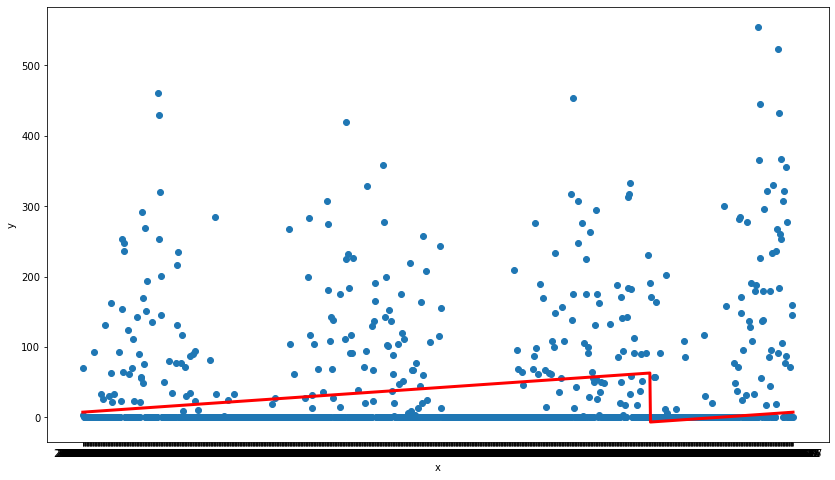

In [108]:
# plot the results
plt.figure(figsize=(14, 8))
ax = plt.axes()
ax.scatter(df.date, y)
ax.plot(df.date, pred, color='red', linewidth=3)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

In [ ]:
import sys

In [ ]:
print(sys.executable)

In [ ]:
mean_squared_error(df.y_predicted.iloc[:920], df.sby_need.iloc[:920])